## Identifying good movies from IMDB 

This project will focus on identifying good movies from a random sample of movies from IMDB. The definition of a 'good movie' in this case depends on the IMDB rating of a movie. The threshold value for a good movie will be defined later in the project, as it depends on the distribution of movie ratings on IMDB. This project will be considered succesful if it increases the baseline accuracy of identifying good movies. 

As features, this project uses information that is independent of ratings to try and predict whether a movie will be succesful. An easy way to determine if a movie is good would be by looking at the reviews, but since these are only known after the movie is released (and correlate highly with movie ratings), this project tries to look at other features (such as the genre, whether or not the movie has a tagline, the actors, directors, and the outline of the plot).

The project will use decision trees to try to maximize the accuracy of the prediction of good movies using the features described earlier.

The project uses an Imdb api to collect random movies from the database.

In [1]:
import pandas as pd
import numpy as np
from imdbpie import Imdb

In [2]:
imdb = Imdb(anonymize=True)

## Data collection

To get a random sample, IMDB is scraped using a random ID generator. These ID's follow a pattern, in which higher ID values represent more recent additions to the database. More recent additions, however, tend to be TV episodes or TV shows. To get features efficiently, the first random integer only has a range of 0 to 4 (this means the probability of the ID corresponding with a movie is much higher, but the movies identified will tend to be older).

In [3]:
df=pd.DataFrame()

In [ ]:
# This is the code I used to scrape initially, but I will not run it again in this version of the notebook
movie_count = 0 
for i in range(10000):
    id_ = 'tt'+str(0)+str(np.random.randint(0,4))+''.join(["%s" % np.random.randint(0, 9) for num in range(5)])
    print id_
    if imdb.title_exists(id_):
        try:
            title = imdb.get_title_by_id(id_)
            if title.type=='feature':
                if title.plot_outline!=None:
                    df.loc[i,'rating']=title.rating
                    df.loc[i,'title']=title.title
                    df.loc[i,'year']=title.year
                    for z in range(len(title.directors_summary)):
                        df.loc[i, 'director'+str(z)]=str(title.directors_summary[z]).rsplit("'")[1]
                    df.loc[i, 'runtime']= title.runtime
                    for y in range(len(title.genres)):
                        df.loc[i, 'genres'+str(y)]=title.genres[y]
                    for x in range(len(title.cast_summary)):
                        df.loc[i, 'actor' +str(x)]= str(title.cast_summary[x]).rsplit("'")[1]
                    df.loc[i, 'tagline']= title.tagline
                    df.loc[i, 'outline']= title.plot_outline
                    movie_count+=1
                    print movie_count
                    if movie_count == 500:
                        break
                else:
                    pass
            else:
                pass
        except:
            pass

We have scraped 527 features in the dataset, all of which are selected to have a plot outline. However, the dataframe info below shows that not all of the movies have ratings. The data will need some further cleaning.

In [4]:
#df.head()

Empty DataFrame
Columns: []
Index: []

In [12]:
#df.to_csv('Dataset/imdb_scrape.csv', sep=';', encoding ='utf-8')

## Data cleaning

In [5]:
import pandas as pd
import numpy as np
from __future__ import division

In [6]:
df = pd.read_csv('Dataset/imdb_scrape.csv', sep =';', encoding = 'utf-8')

In [7]:
(df['title'].value_counts()).head()

Sunday                               2
Buckskin                             2
Profit and the Loss                  2
Dirty Hands                          1
The Woman Who Wanted an Apartment    1
Name: title, dtype: int64

We can also identify some duplicate values in our database, since there is some overlap caused by the random ID generator. We remove these duplicates.

In [8]:
df = df.drop_duplicates('title')

In [9]:
(df['title'].value_counts()).head()

Bubbles Galore            1
Er ling ba ke ji          1
Forever Yours             1
Riders of the Badlands    1
No Escape                 1
Name: title, dtype: int64

In [10]:
df = df.drop('Unnamed: 0', axis=1)

Rows that have missing values in the rating, runtime, or primary genre columns are dropped from the dataframe.

In [11]:
df = df[pd.notnull(df['rating'])]
df = df[pd.notnull(df['runtime'])]
df = df[pd.notnull(df['genres0'])]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 1 to 526
Data columns (total 18 columns):
rating       412 non-null float64
title        412 non-null object
year         412 non-null float64
director0    410 non-null object
runtime      412 non-null float64
genres0      412 non-null object
genres1      258 non-null object
actor0       412 non-null object
actor1       412 non-null object
actor2       412 non-null object
actor3       411 non-null object
tagline      185 non-null object
outline      412 non-null object
genres2      128 non-null object
genres3      53 non-null object
director1    20 non-null object
genres4      16 non-null object
genres5      1 non-null object
dtypes: float64(3), object(15)
memory usage: 61.2+ KB


In [13]:
df.describe()

rating         year       runtime
count  412.000000   412.000000    412.000000
mean     6.083010  1972.283981   5557.281553
std      1.083341    22.788447   1414.912028
min      1.300000  1914.000000   1620.000000
25%      5.500000  1954.000000   4800.000000
50%      6.250000  1975.000000   5460.000000
75%      6.800000  1993.000000   6015.000000
max      8.800000  2006.000000  15000.000000

In [14]:
df = df.reset_index(drop=True)

## Defining the target variable

Based on the distribution, it will be a relatively well-balanced sample if a threshold of 6.5 is chosen to distinguish good movies from bad movies. If a movie has a rating below 6.5, it is considered not good, while a movie with 6.5 or higher will be considered good.

In [15]:
for i in range(len(df['rating'])):
    if df.loc[i, 'rating']<6.5:
        df.loc[i, 'good_movie'] =0
    else:
        df.loc[i, 'good_movie'] =1

In [16]:
print 'Bad movies: ' + str(df['good_movie'].value_counts()[0])
print 'Good movies: ' + str(df['good_movie'].value_counts()[1])
print 'Baseline accuracy: ' +str(df['good_movie'].value_counts()[0]/(df['good_movie'].value_counts()[0]+df['good_movie'].value_counts()[1]))

Bad movies: 246
Good movies: 166
Baseline accuracy: 0.597087378641


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizations

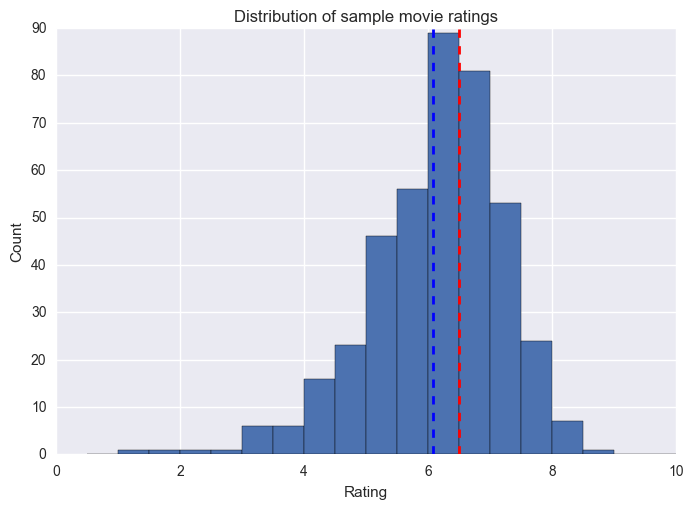

In [18]:
plt.hist(df['rating'], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
plt.axvline(df['rating'].mean(), color='b', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(6.5, color='r', linestyle='dashed', linewidth=2, label='Cut-off good movies')
plt.xlim(0,10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of sample movie ratings')
plt.show()

The distribution of ratings seems to be negatively skewed. The mean is lower than the median, which is lower than the mode. The cutoff point for being a good movie in this project is a rating of 6.5, which is displayed by the red dotted line in the histogram.

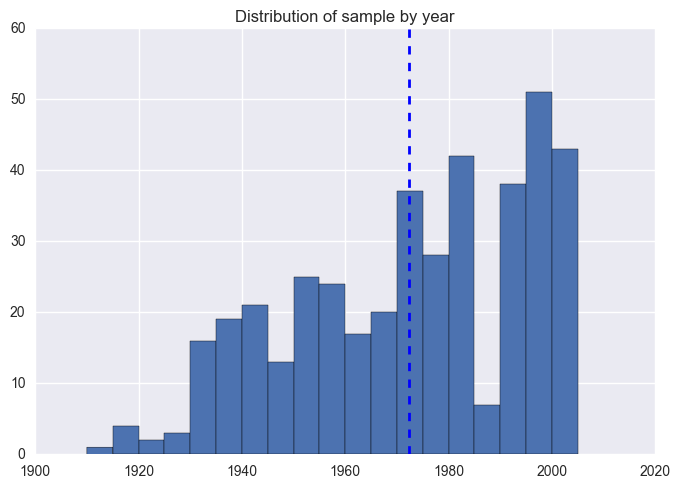

In [19]:
plt.hist(df['year'], bins =range(1910,2010, 5))
plt.axvline(df['year'].mean(), color='b', linestyle='dashed', linewidth=2, label='Mean')
plt.title("Distribution of sample by year")
plt.show()

As can be seen from this chart, recent movies (movies after 2004) are not included in the sample. What is also interesting is that there seem to be relatively few movies in our dataset that were released in the time period 1985-1989, even though there is a relatively large amount of more recent movies in the distribution.

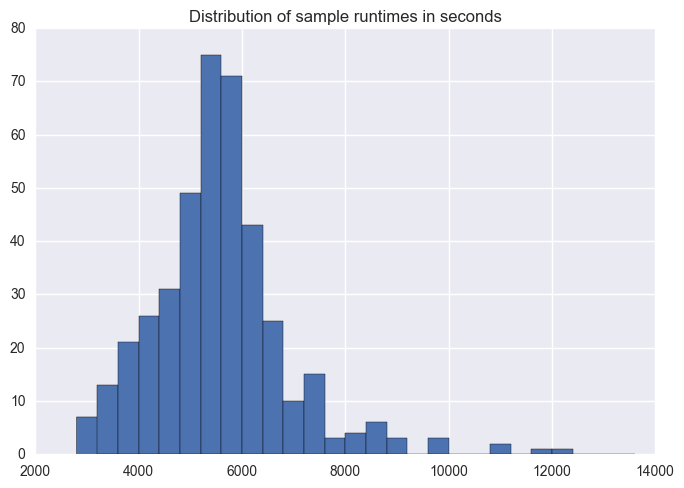

In [20]:
plt.hist(df['runtime'], bins =range(2800, 14000, 400))
plt.title("Distribution of sample runtimes in seconds")
plt.show()

There are a few large outliers in the dataset (movies that last longer than 12000 seconds, which is almost 3,5 hours). The average movie seems to last a little over one and a half hour.

## Defining the features to be used in the analysis.

In [21]:
for i in range(len(df['tagline'])):
    if pd.isnull(df['tagline'])[i]:
        df.loc[i, 'has_tagline']=0
    else:
        df.loc[i, 'has_tagline']=1

One of the features to predict whether a movie will be good or not, is to see whether the movie has a tagline or not. This may have predictive power for defining whether a movie will be good or not.

In [22]:
for i in range(len(df['director1'])):
    if pd.isnull(df['director1'])[i]:
        df.loc[i, 'mult_directors']=0
    else:
        df.loc[i, 'mult_directors']=1

Another feature that is created is a dummy for movies that have multiple directors. This might lead to better movies.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=200, ngram_range=(1,5), stop_words='english')
data = cv.fit_transform(df.outline).todense()
columns = [c for c in cv.get_feature_names()]
outlinedf = pd.DataFrame(data, columns=columns)
outlinedf.columns = ['out_' + str(col) for col in outlinedf.columns]
outlinedf.head()

out_accused  out_actress  out_affair  out_african  out_age  out_agent  \
0            0            0           0            0        0          0   
1            0            0           0            0        0          0   
2            0            0           0            0        0          0   
3            0            0           0            0        0          0   
4            0            0           0            0        0          0   

   out_american  out_arrives  out_baby  out_band       ...         \
0             0            0         0         0       ...          
1             0            0         0         0       ...          
2             0            0         0         0       ...          
3             0            0         0         0       ...          
4             0            0         0         0       ...          

   out_working  out_world  out_writer  out_year  out_year old  out_years  \
0            0          0           0         0             0          0   
1            0          1           0         0             0          0   
2            0          0           0         0             0          0   
3            0          0           0         0             0          0   
4            0          0           0         0             0          0   

   out_york  out_young  out_young man  out_young woman  
0         0          0              0                0  
1         0          0              0                0  
2         0          0              0                0  
3         0          0              0                0  
4         0          0              0                0  

[5 rows x 200 columns]

The outline may have a certain predictive power for the success of a movie: certain words in an outline may predict that a movie will have a better rating. In this case I set ngram_range to range between 1 and 5, which means a sequence of words up to a length of 5 words can also be a feature if it occurs frequently in the outline. I limit the amount of features to 200.

In [24]:
genre1 = pd.get_dummies(df.loc[:,'genres0'], prefix = 'gen_')
genre2 = pd.get_dummies(df.loc[:,'genres1'], prefix = 'gen_')
genre3 = pd.get_dummies(df.loc[:,'genres2'], prefix = 'gen_')
genre4 = pd.get_dummies(df.loc[:,'genres3'], prefix = 'gen_')
genre12 = genre1.add(genre2, fill_value=0)
genre123 = genre12.add(genre3, fill_value = 0)
genre = genre123.add(genre4, fill_value = 0)

The genre of a movie may also determine whether a movie will receive a good rating or not.

In [25]:
df_new = df.join(outlinedf)
df_new = df_new.join(genre)

In [26]:
df_new = df_new.drop(df.loc[:,'genres0':'genres5'], axis=1)
df_new = df_new.drop('director0', axis=1)

In [27]:
y = df_new['good_movie']

In [28]:
X = df_new.loc[:, 'year':]
X = X.drop('good_movie', axis=1)

Finally, all of the numerical features selected are scaled, to make sure that they are treated equally and that the model does not misinterpret the size and significance of different feature values.

In [29]:
from sklearn.preprocessing import StandardScaler
X[['year', 'runtime']] = pd.DataFrame(StandardScaler().fit_transform(X[['year', 'runtime']]), columns = ['year', 'runtime'])

In [30]:
X.head()

year   runtime  has_tagline  mult_directors  out_accused  out_actress  \
0 -0.276088 -0.153752          0.0             0.0            0            0   
1 -1.857757 -0.748150          0.0             0.0            0            0   
2  1.173775  1.119958          0.0             0.0            0            0   
3  1.041969  1.799271          0.0             0.0            0            0   
4  1.217710 -0.068838          0.0             0.0            0            0   

   out_affair  out_african  out_age  out_agent      ...       gen__Horror  \
0           0            0        0          0      ...               0.0   
1           0            0        0          0      ...               0.0   
2           0            0        0          0      ...               0.0   
3           0            0        0          0      ...               0.0   
4           0            0        0          0      ...               0.0   

   gen__Music  gen__Musical  gen__Mystery  gen__Romance  gen__Sci-Fi  \
0         0.0           0.0           0.0           0.0          0.0   
1         0.0           0.0           0.0           1.0          0.0   
2         0.0           0.0           0.0           0.0          0.0   
3         0.0           0.0           0.0           1.0          0.0   
4         0.0           0.0           0.0           1.0          0.0   

   gen__Sport  gen__Thriller  gen__War  gen__Western  
0         0.0            0.0       0.0           0.0  
1         0.0            0.0       0.0           0.0  
2         0.0            0.0       0.0           0.0  
3         0.0            0.0       0.0           0.0  
4         0.0            0.0       0.0           0.0  

[5 rows x 226 columns]

The sample is split into a testing sample and a training set, so that there is no information spillover and so that there is a fair assessment of the accuracy of the model.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

To start off, we use decision tree classifiers to look into our classification problem. 

In [32]:
from sklearn.tree import DecisionTreeClassifier
treereg = DecisionTreeClassifier()
treereg.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [33]:
preds = treereg.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print classification_report(y_test, preds)

             precision    recall  f1-score   support

        0.0       0.73      0.72      0.73        81
        1.0       0.49      0.51      0.50        43

avg / total       0.65      0.65      0.65       124



The decision tree leads to a fairly poor score compared to our baseline accuracy, indicating that the features do not have a lot of predictive power. The model seems to be able to identify movies that are not good pretty well, but does not do a good job predicting movies that are good.

In [35]:
print confusion_matrix(y_test, preds)

[[58 23]
 [21 22]]


In [36]:
from sklearn.model_selection import GridSearchCV
params = dict(max_depth=range(1,2), min_samples_split=range(2,5), max_features = (2,5, 10, 30, 50, 100, 200))
gridsearch = GridSearchCV(estimator = treereg, param_grid = params, cv=5)

In [37]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': (2, 5, 10, 30, 50, 100, 200), 'min_samples_split': [2, 3, 4], 'max_depth': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [38]:
gridsearch.best_params_

{'max_depth': 1, 'max_features': 200, 'min_samples_split': 2}

In [39]:
gridsearch.best_score_

0.61458333333333337

In [40]:
model = DecisionTreeClassifier(max_depth=1, max_features=100, min_samples_split=4).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.60483870967741937

In [42]:
from os import system
from sklearn.tree import export_graphviz
def build_tree_image(model, filename='tree.png'):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model, out_file = dotfile, feature_names = X.columns,filled=True,
                    rounded=True,special_characters=True)
    dotfile.close()
    system("dot -Tpng tree.dot -o {0}".format(filename))

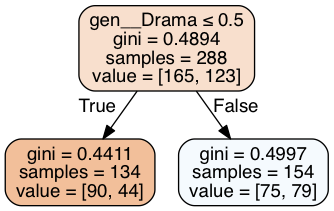

In [3]:
from IPython.core.display import Image 
Image(filename='Images/tree_new.png')

The decision tree seems to make a very simple decision. It checks whether a movie is a drama or not, and decides based on that if a movie is good or not. The model seems to increase the baseline, but barely does so. It predicts all dramas to be good and all movies that are different genres to be bad, and by doing so the model increases the baseline from 59.7% accuracy to 60.5% accuracy in the test set.

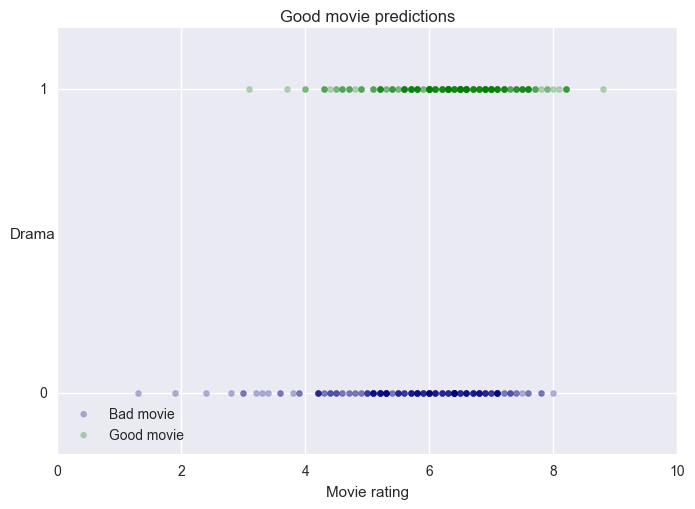

In [59]:

y_pred_df = model.predict(X)

colors = ['navy', 'green']
lw = 0.1

for color, i, target_name in zip(colors, [0,1], ['Bad movie', 'Good movie']):
    plt.scatter(df.loc[y_pred_df == i, 'rating'],X.loc[y_pred_df == i, 'gen__Drama'], color=color, alpha=0.3, lw=lw, label=target_name)
plt.xlabel('Movie rating')
plt.ylabel('Drama', rotation = 0, verticalalignment = 'bottom', horizontalalignment = 'center')
plt.yticks(range(2))
plt.legend(loc=3, shadow=False, scatterpoints=1)

plt.title('Good movie predictions')

plt.show()

## Conclusion

The predictive power of the models used is pretty poor. In my view this can be explained by the random sample that I have selected, and the lack of predictive power of the features selected. Runtime, words in an outline, the number of directors or whether the movie has a tagline do not seem to be able to predict whether a movie is succesful or not. Future projects should include better features. However, including reviews did not seem fair to me, since these are written as a response to the quality of a movie. So this means that even though it might be highly correlated with a movie rating, it has no predictive power to see whether a movie will be succesful or not. For future projects it would be better to use other features that are known before a movie is released (such as production value).